# EMOTION DETECTION MODEL USING CONVOLUTIONAL NEURAL NETWORK AND OPENCV


# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

# Display Images:

plot the happy expression images using subplot.

In [2]:
picture_size=48
folder_path="C:/Users/hp/Desktop/Deep learning project/images/"

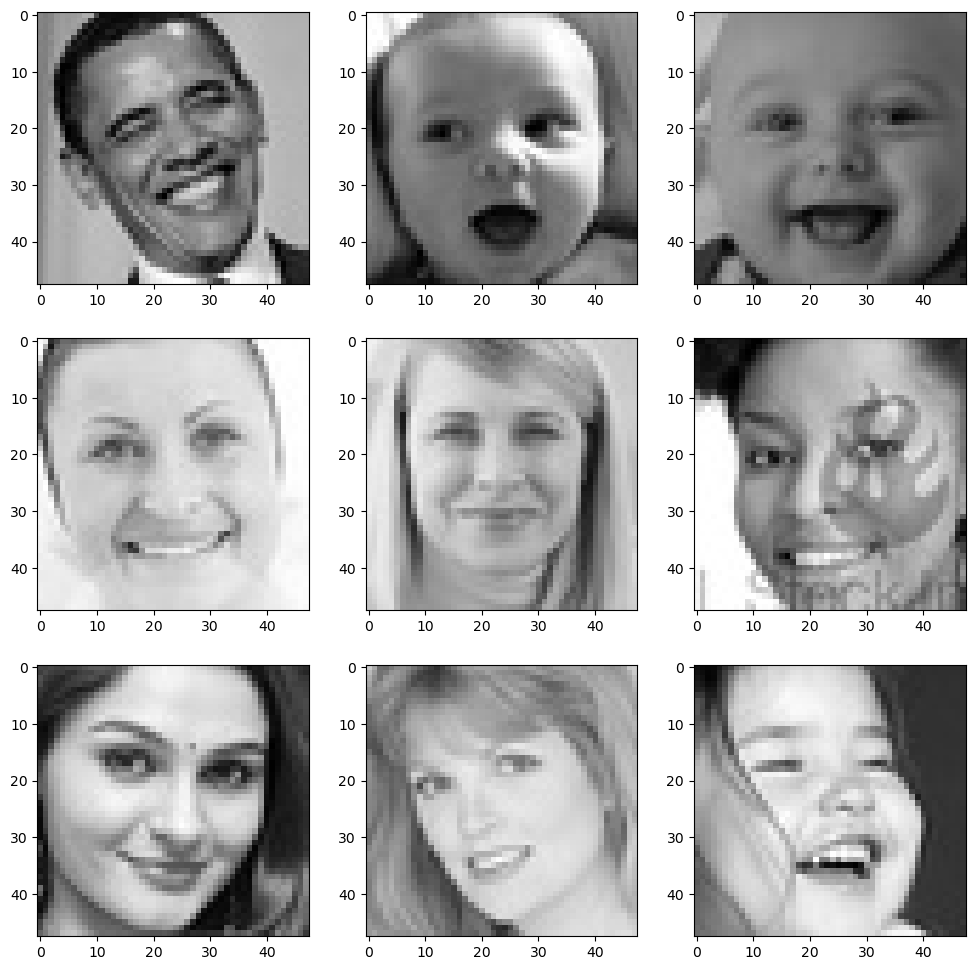

In [3]:
expression='happy'
plt.figure(figsize=(12,12))
for i in range(1,10,1):
    plt.subplot(3,3,i)
    img=load_img(folder_path+"train/"+expression+"/"+
                os.listdir(folder_path+"train/"+expression)[i],target_size=(picture_size,picture_size))
    plt.imshow(img)
plt.show()

# Import DeepLearning Libraries


The Sequential class is a linear stack of neural network layers that can be used to build a deep learning model.

The layers imported are Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, and MaxPooling2D. These layers are building blocks used to construct a neural network.

Adam optimizer, which is a popular optimization algorithm used to train deep learning models.

ImageDataGenerator class, which is used to generate batches of tensor image data with real-time data augmentation.

In [4]:
from keras.models import Sequential
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

# Initialize image data generator with rescaling

In [5]:
datagen_train=ImageDataGenerator(rescale=1./255)
datagen_val=ImageDataGenerator(rescale=1./255)

# Preprocess all test and train images

The parameters used in flow_from_directory() are:


target_size: A tuple that specifies the height and width of the images after they are resized. In this case, the images are resized to (picture_size,picture_size) pixels.

color_mode: A string that specifies the color space of the images. "grayscale" indicates that the images are grayscale and have only one channel.

batch_size: An integer that specifies the number of images in each batch. In this case, the batch size is set to 64.

class_mode: A string that specifies the type of labels returned by the generator. "categorical" means that the labels are one-hot encoded categorical vectors.

shuffle: A boolean that specifies whether to shuffle the order of the images in each epoch. In this case, shuffling is set to True in train data ,shuffle set to False in test data.

In [6]:
train_set=datagen_train.flow_from_directory(folder_path+"train",
                                            target_size=(picture_size,picture_size),
                                            color_mode="grayscale",
                                            batch_size=64,
                                            class_mode="categorical",
                                            shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"validation",
                                         target_size=(picture_size,picture_size),
                                        color_mode="grayscale",
                                         batch_size=64,
                                         class_mode="categorical",
                                         shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


# Model Building


The model consists of several layers, including Convolutional Layers, MaxPooling Layers, Dropout Layers, and Dense Layers.

The input images to the model are grayscale images of size 48x48 pixels. The first layer is a convolutional layer with 32 filters, followed by another convolutional layer with 64 filters. These layers are followed by a max pooling layer, which reduces the spatial dimensions of the output feature maps.

Next, there is a dropout layer, which helps prevent overfitting. The model then has another set of convolutional and max pooling layers with 128 filters, followed by another dropout layer.

After these layers, the feature maps are flattened and passed through two fully connected (dense) layers, with the first one having 1024 neurons and a ReLU activation function. Another dropout layer is added after this dense layer to prevent overfitting.

Finally, the output layer is a dense layer with 7 neurons and a softmax activation function, which outputs the probabilities of the input image belonging to each of the 7 emotions.

The model is compiled with the categorical cross-entropy loss function, the Adam optimizer with a learning rate of 0.0001 and decay rate of 1e-6, and accuracy as the evaluation metric.



In [7]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(48,48,1)))
model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation="relu",input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(7,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer=Adam(lr=0.0001,decay=1e-6),metrics=["accuracy"])

C:\Users\hp\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 22, 22, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 22, 22, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 128)      0         
 2D)                                                    

# Train the neural network model

In [9]:
model_info=model.fit_generator(train_set,steps_per_epoch=28821//64,epochs=40,validation_data=test_set,
                              validation_steps=7066//64)


C:\Users\hp\AppData\Local\Temp\ipykernel_6368\3354263491.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_info=model.fit_generator(train_set,steps_per_epoch=28821//64,epochs=40,validation_data=test_set,


Epoch 1/40
450/450 [==============================] - 381s 846ms/step - loss: 1.8026 - accuracy: 0.2571 - val_loss: 1.7100 - val_accuracy: 0.3412
Epoch 2/40
450/450 [==============================] - 240s 534ms/step - loss: 1.6290 - accuracy: 0.3619 - val_loss: 1.5363 - val_accuracy: 0.4170
Epoch 3/40
450/450 [==============================] - 238s 528ms/step - loss: 1.5212 - accuracy: 0.4139 - val_loss: 1.4569 - val_accuracy: 0.4501
Epoch 4/40
450/450 [==============================] - 238s 528ms/step - loss: 1.4457 - accuracy: 0.4478 - val_loss: 1.3905 - val_accuracy: 0.4734
Epoch 5/40
450/450 [==============================] - 235s 523ms/step - loss: 1.3855 - accuracy: 0.4724 - val_loss: 1.3340 - val_accuracy: 0.4942
Epoch 6/40
450/450 [==============================] - 236s 524ms/step - loss: 1.3360 - accuracy: 0.4920 - val_loss: 1.2967 - val_accuracy: 0.5078
Epoch 7/40
450/450 [==============================] - 236s 525ms/step - loss: 1.2955 - accuracy: 0.5082 - val_loss: 1.2542 -

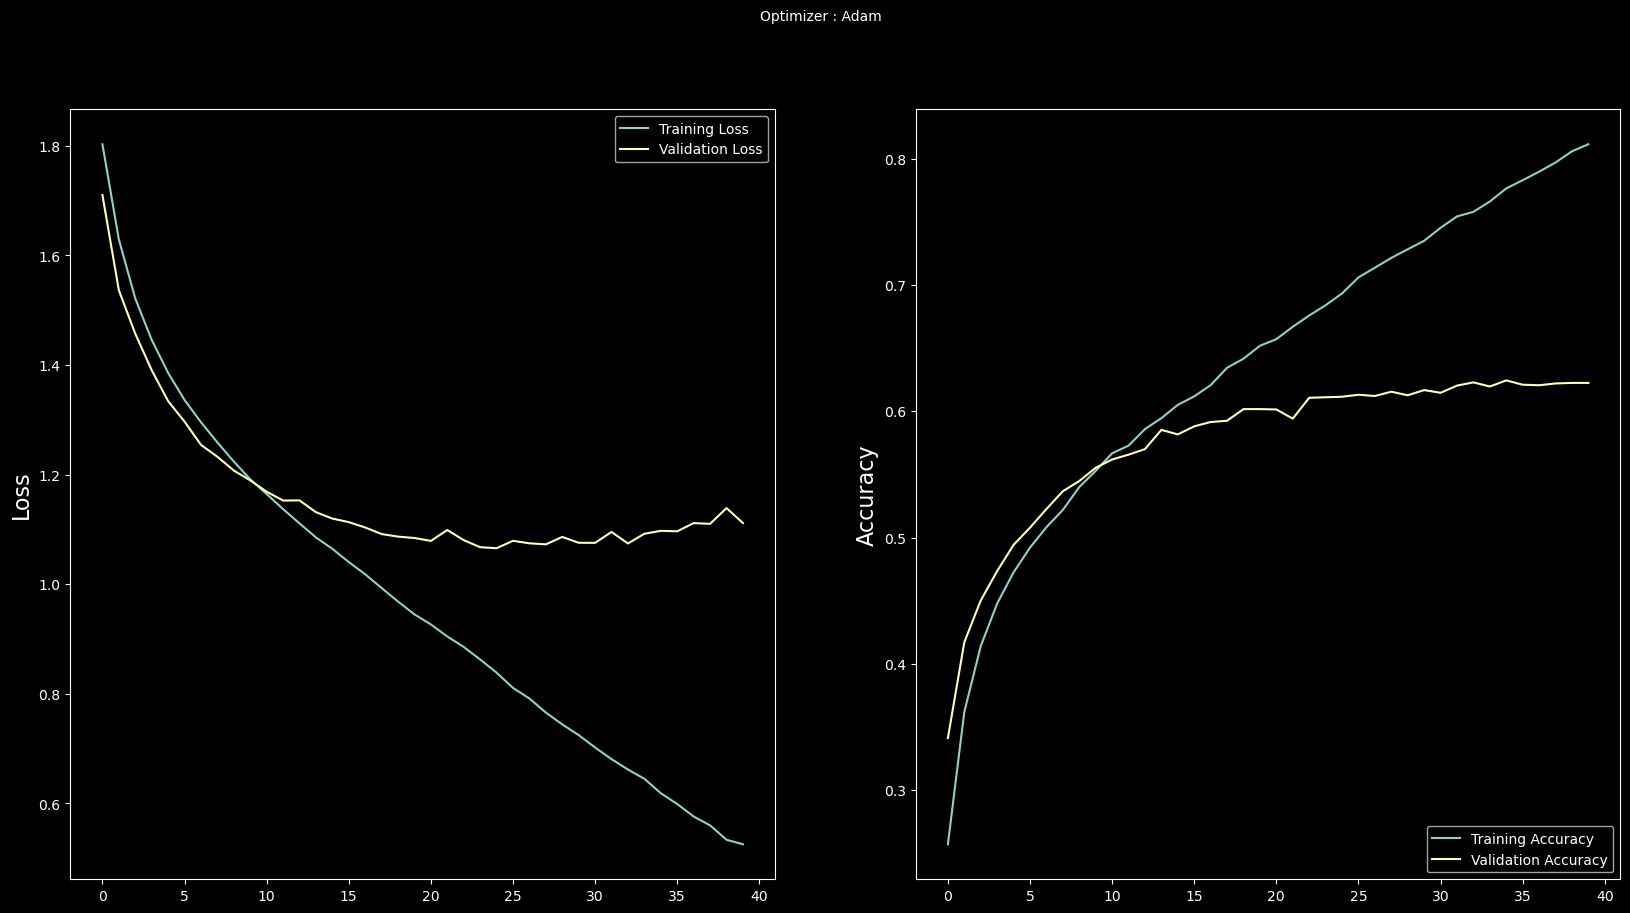

In [13]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(model_info.history['loss'], label='Training Loss')
plt.plot(model_info.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(model_info.history['accuracy'], label='Training Accuracy')
plt.plot(model_info.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()


# Save model structure in json file

In [14]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Save trained model weight in .h5 file

In [15]:
model.save_weights("model.h5")